In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_alex_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                96, (11, 11), strides=(4, 4), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(256, (5, 5), activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(384, (3, 3), activation="relu"),
            keras.layers.Conv2D(256, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [7]:
alex_net_wrapper = ModelWrapper("AlexNet", preprocessing_utils=preprocessing_utils)

In [8]:
alex_net_wrapper.build_model(build_fn=build_alex_net, model_name=alex_net_wrapper.model_name)

Building model...
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                         

In [9]:
alex_net_wrapper.train_and_save_model()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 48.4151 - accuracy: 0.0662
Epoch 1: val_loss improved from inf to 31.87669, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 15s 645ms/step - loss: 48.4151 - accuracy: 0.0662 - val_loss: 31.8767 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 24.3222 - accuracy: 0.0834
Epoch 2: val_loss improved from 31.87669 to 15.82162, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 491ms/step - loss: 24.3222 - accuracy: 0.0834 - val_loss: 15.8216 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 3/100
8/9 [=========================>....] - ETA: 0s - loss: 12.6134 - accuracy: 0.0950
Epoch 3: val_loss improved from 15.82162 to 9.22787, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 488ms/step - loss: 12.5318 - accuracy: 0.0954 - val_loss: 9.2279 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 7.9175 - accuracy: 0.1068
Epoch 4: val_loss improved from 9.22787 to 6.72548, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 5s 550ms/step - loss: 7.9175 - accuracy: 0.1068 - val_loss: 6.7255 - val_accuracy: 0.0507 - lr: 0.0010
Epoch 5/100
8/9 [=========================>....] - ETA: 0s - loss: 5.9814 - accuracy: 0.1360
Epoch 5: val_loss improved from 6.72548 to 5.50465, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 5s 521ms/step - loss: 5.9662 - accuracy: 0.1360 - val_loss: 5.5046 - val_accuracy: 0.0691 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - ETA: 0s - loss: 4.8925 - accuracy: 0.1477
Epoch 6: val_loss improved from 5.50465 to 4.79778, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 486ms/step - loss: 4.8925 - accuracy: 0.1477 - val_loss: 4.7978 - val_accuracy: 0.0553 - lr: 0.0010
Epoch 7/100
8/9 [=========================>....] - ETA: 0s - loss: 4.2422 - accuracy: 0.1635
Epoch 7: val_loss improved from 4.79778 to 4.16898, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 468ms/step - loss: 4.2379 - accuracy: 0.1615 - val_loss: 4.1690 - val_accuracy: 0.0922 - lr: 0.0010
Epoch 8/100
9/9 [==============================] - ETA: 0s - loss: 3.8710 - accuracy: 0.1576
Epoch 8: val_loss improved from 4.16898 to 3.92797, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 464ms/step - loss: 3.8710 - accuracy: 0.1576 - val_loss: 3.9280 - val_accuracy: 0.0968 - lr: 0.0010
Epoch 9/100
8/9 [=========================>....] - ETA: 0s - loss: 3.5410 - accuracy: 0.1873
Epoch 9: val_loss improved from 3.92797 to 3.90476, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 5s 570ms/step - loss: 3.5359 - accuracy: 0.1885 - val_loss: 3.9048 - val_accuracy: 0.0691 - lr: 0.0010
Epoch 10/100
8/9 [=========================>....] - ETA: 0s - loss: 3.3458 - accuracy: 0.2027
Epoch 10: val_loss improved from 3.90476 to 3.57910, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 490ms/step - loss: 3.3416 - accuracy: 0.2029 - val_loss: 3.5791 - val_accuracy: 0.1106 - lr: 0.0010
Epoch 11/100
9/9 [==============================] - ETA: 0s - loss: 3.2213 - accuracy: 0.2021
Epoch 11: val_loss did not improve from 3.57910
9/9 [==============================] - 2s 200ms/step - loss: 3.2213 - accuracy: 0.2021 - val_loss: 3.8162 - val_accuracy: 0.0645 - lr: 0.0010
Epoch 12/100
9/9 [==============================] - ETA: 0s - loss: 3.1233 - accuracy: 0.2184
Epoch 12: val_loss improved from 3.57910 to 3.43247, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 5s 587ms/step - loss: 3.1233 - accuracy: 0.2184 - val_loss: 3.4325 - val_accuracy: 0.1060 - lr: 0.0010
Epoch 13/100
8/9 [=========================>....] - ETA: 0s - loss: 3.0044 - accuracy: 0.2288
Epoch 13: val_loss improved from 3.43247 to 3.40375, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 5s 560ms/step - loss: 3.0042 - accuracy: 0.2289 - val_loss: 3.4037 - val_accuracy: 0.1014 - lr: 0.0010
Epoch 14/100
9/9 [==============================] - ETA: 0s - loss: 2.8996 - accuracy: 0.2457
Epoch 14: val_loss did not improve from 3.40375
9/9 [==============================] - 2s 214ms/step - loss: 2.8996 - accuracy: 0.2457 - val_loss: 3.4372 - val_accuracy: 0.0968 - lr: 0.0010
Epoch 15/100
8/9 [=========================>....] - ETA: 0s - loss: 2.8381 - accuracy: 0.2580
Epoch 15: val_loss improved from 3.40375 to 3.21918, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 477ms/step - loss: 2.8386 - accuracy: 0.2578 - val_loss: 3.2192 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 16/100
9/9 [==============================] - ETA: 0s - loss: 2.7888 - accuracy: 0.2722
Epoch 16: val_loss did not improve from 3.21918
9/9 [==============================] - 2s 230ms/step - loss: 2.7888 - accuracy: 0.2722 - val_loss: 3.3408 - val_accuracy: 0.1152 - lr: 0.0010
Epoch 17/100
9/9 [==============================] - ETA: 0s - loss: 2.7406 - accuracy: 0.2934
Epoch 17: val_loss did not improve from 3.21918
9/9 [==============================] - 2s 258ms/step - loss: 2.7406 - accuracy: 0.2934 - val_loss: 3.3809 - val_accuracy: 0.1014 - lr: 0.0010
Epoch 18/100
9/9 [==============================] - ETA: 0s - loss: 2.6617 - accuracy: 0.3148
Epoch 18: val_loss did not improve from 3.21918
9/9 [==============================] - 3s 233ms/step - loss: 2.6617 - accuracy: 0.3148 - val_loss: 3.3467 - val_accuracy: 0.1244 - lr: 0.0010
Epoch 

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 494ms/step - loss: 2.5348 - accuracy: 0.3527 - val_loss: 3.1962 - val_accuracy: 0.1797 - lr: 5.0000e-04
Epoch 20/100
9/9 [==============================] - ETA: 0s - loss: 2.4042 - accuracy: 0.3680
Epoch 20: val_loss did not improve from 3.19616
9/9 [==============================] - 2s 217ms/step - loss: 2.4042 - accuracy: 0.3680 - val_loss: 3.3797 - val_accuracy: 0.1336 - lr: 5.0000e-04
Epoch 21/100
9/9 [==============================] - ETA: 0s - loss: 2.3116 - accuracy: 0.3829
Epoch 21: val_loss did not improve from 3.19616
9/9 [==============================] - 2s 220ms/step - loss: 2.3116 - accuracy: 0.3829 - val_loss: 3.2048 - val_accuracy: 0.1751 - lr: 5.0000e-04
Epoch 22/100
8/9 [=========================>....] - ETA: 0s - loss: 2.2778 - accuracy: 0.3940
Epoch 22: val_loss did not improve from 3.19616
9/9 [==============================] - 2s 194ms/step - loss: 2.2748 - accuracy: 0.3950 - val_loss: 3.3250 - val_accuracy: 0.1613 - lr: 5

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 456ms/step - loss: 2.1408 - accuracy: 0.4361 - val_loss: 3.1148 - val_accuracy: 0.2074 - lr: 2.5000e-04
Epoch 24/100
8/9 [=========================>....] - ETA: 0s - loss: 2.0382 - accuracy: 0.4630
Epoch 24: val_loss improved from 3.11481 to 3.02601, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 469ms/step - loss: 2.0381 - accuracy: 0.4634 - val_loss: 3.0260 - val_accuracy: 0.2442 - lr: 2.5000e-04
Epoch 25/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9924 - accuracy: 0.4678
Epoch 25: val_loss did not improve from 3.02601
9/9 [==============================] - 2s 196ms/step - loss: 1.9830 - accuracy: 0.4707 - val_loss: 3.1643 - val_accuracy: 0.1797 - lr: 2.5000e-04
Epoch 26/100
8/9 [=========================>....] - ETA: 0s - loss: 1.9530 - accuracy: 0.4770
Epoch 26: val_loss did not improve from 3.02601
9/9 [==============================] - 2s 194ms/step - loss: 1.9492 - accuracy: 0.4777 - val_loss: 3.1632 - val_accuracy: 0.2166 - lr: 2.5000e-04
Epoch 27/100
9/9 [==============================] - ETA: 0s - loss: 1.8923 - accuracy: 0.5009
Epoch 27: val_loss did not improve from 3.02601
9/9 [==============================] - 2s 195ms/step - loss: 1.8923 - accuracy: 0.5009 - val_loss: 3.1594 - val_accuracy: 0.2120 - lr: 2

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 5s 575ms/step - loss: 1.6104 - accuracy: 0.5887 - val_loss: 2.9536 - val_accuracy: 0.2673 - lr: 6.2500e-05
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 1.5830 - accuracy: 0.6006
Epoch 32: val_loss did not improve from 2.95365
9/9 [==============================] - 2s 257ms/step - loss: 1.5830 - accuracy: 0.6006 - val_loss: 3.1273 - val_accuracy: 0.2442 - lr: 6.2500e-05
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 1.5356 - accuracy: 0.6120
Epoch 33: val_loss did not improve from 2.95365
9/9 [==============================] - 2s 252ms/step - loss: 1.5356 - accuracy: 0.6120 - val_loss: 2.9861 - val_accuracy: 0.2765 - lr: 6.2500e-05
Epoch 34/100
8/9 [=========================>....] - ETA: 0s - loss: 1.5215 - accuracy: 0.6118
Epoch 34: val_loss did not improve from 2.95365
9/9 [==============================] - 2s 166ms/step - loss: 1.5198 - accuracy: 0.6113 - val_loss: 3.0017 - val_accuracy: 0.2765 - lr: 6

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 404ms/step - loss: 1.4693 - accuracy: 0.6317 - val_loss: 2.9356 - val_accuracy: 0.3088 - lr: 3.1250e-05
Epoch 37/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4526 - accuracy: 0.6285
Epoch 37: val_loss did not improve from 2.93564
9/9 [==============================] - 1s 160ms/step - loss: 1.4506 - accuracy: 0.6290 - val_loss: 2.9598 - val_accuracy: 0.2995 - lr: 3.1250e-05
Epoch 38/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4306 - accuracy: 0.6370
Epoch 38: val_loss improved from 2.93564 to 2.88470, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 391ms/step - loss: 1.4317 - accuracy: 0.6351 - val_loss: 2.8847 - val_accuracy: 0.2995 - lr: 3.1250e-05
Epoch 39/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4142 - accuracy: 0.6475
Epoch 39: val_loss did not improve from 2.88470
9/9 [==============================] - 2s 162ms/step - loss: 1.4177 - accuracy: 0.6466 - val_loss: 2.8887 - val_accuracy: 0.3041 - lr: 3.1250e-05
Epoch 40/100
8/9 [=========================>....] - ETA: 0s - loss: 1.4093 - accuracy: 0.6428
Epoch 40: val_loss improved from 2.88470 to 2.84389, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 415ms/step - loss: 1.4084 - accuracy: 0.6436 - val_loss: 2.8439 - val_accuracy: 0.3134 - lr: 3.1250e-05
Epoch 41/100
9/9 [==============================] - ETA: 0s - loss: 1.3978 - accuracy: 0.6492
Epoch 41: val_loss improved from 2.84389 to 2.77760, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 482ms/step - loss: 1.3978 - accuracy: 0.6492 - val_loss: 2.7776 - val_accuracy: 0.3272 - lr: 3.1250e-05
Epoch 42/100
9/9 [==============================] - ETA: 0s - loss: 1.3755 - accuracy: 0.6590
Epoch 42: val_loss improved from 2.77760 to 2.76797, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 486ms/step - loss: 1.3755 - accuracy: 0.6590 - val_loss: 2.7680 - val_accuracy: 0.3318 - lr: 3.1250e-05
Epoch 43/100
9/9 [==============================] - ETA: 0s - loss: 1.3686 - accuracy: 0.6655
Epoch 43: val_loss improved from 2.76797 to 2.70198, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 521ms/step - loss: 1.3686 - accuracy: 0.6655 - val_loss: 2.7020 - val_accuracy: 0.3502 - lr: 3.1250e-05
Epoch 44/100
9/9 [==============================] - ETA: 0s - loss: 1.3423 - accuracy: 0.6709
Epoch 44: val_loss did not improve from 2.70198
9/9 [==============================] - 2s 201ms/step - loss: 1.3423 - accuracy: 0.6709 - val_loss: 2.7034 - val_accuracy: 0.3410 - lr: 3.1250e-05
Epoch 45/100
9/9 [==============================] - ETA: 0s - loss: 1.3442 - accuracy: 0.6672
Epoch 45: val_loss did not improve from 2.70198
9/9 [==============================] - 2s 207ms/step - loss: 1.3442 - accuracy: 0.6672 - val_loss: 2.7233 - val_accuracy: 0.3364 - lr: 3.1250e-05
Epoch 46/100
9/9 [==============================] - ETA: 0s - loss: 1.3302 - accuracy: 0.6799
Epoch 46: val_loss improved from 2.70198 to 2.64459, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 465ms/step - loss: 1.3302 - accuracy: 0.6799 - val_loss: 2.6446 - val_accuracy: 0.3641 - lr: 3.1250e-05
Epoch 47/100
9/9 [==============================] - ETA: 0s - loss: 1.3198 - accuracy: 0.6767
Epoch 47: val_loss did not improve from 2.64459
9/9 [==============================] - 2s 208ms/step - loss: 1.3198 - accuracy: 0.6767 - val_loss: 2.6853 - val_accuracy: 0.3502 - lr: 3.1250e-05
Epoch 48/100
9/9 [==============================] - ETA: 0s - loss: 1.3102 - accuracy: 0.6833
Epoch 48: val_loss improved from 2.64459 to 2.63519, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 533ms/step - loss: 1.3102 - accuracy: 0.6833 - val_loss: 2.6352 - val_accuracy: 0.3502 - lr: 3.1250e-05
Epoch 49/100
9/9 [==============================] - ETA: 0s - loss: 1.2870 - accuracy: 0.6911
Epoch 49: val_loss improved from 2.63519 to 2.62385, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 467ms/step - loss: 1.2870 - accuracy: 0.6911 - val_loss: 2.6238 - val_accuracy: 0.3548 - lr: 3.1250e-05
Epoch 50/100
9/9 [==============================] - ETA: 0s - loss: 1.2834 - accuracy: 0.6930
Epoch 50: val_loss did not improve from 2.62385
9/9 [==============================] - 2s 206ms/step - loss: 1.2834 - accuracy: 0.6930 - val_loss: 2.6347 - val_accuracy: 0.3594 - lr: 3.1250e-05
Epoch 51/100
9/9 [==============================] - ETA: 0s - loss: 1.2702 - accuracy: 0.6911
Epoch 51: val_loss improved from 2.62385 to 2.57122, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 473ms/step - loss: 1.2702 - accuracy: 0.6911 - val_loss: 2.5712 - val_accuracy: 0.3594 - lr: 3.1250e-05
Epoch 52/100
9/9 [==============================] - ETA: 0s - loss: 1.2569 - accuracy: 0.6981
Epoch 52: val_loss did not improve from 2.57122
9/9 [==============================] - 2s 204ms/step - loss: 1.2569 - accuracy: 0.6981 - val_loss: 2.6577 - val_accuracy: 0.3733 - lr: 3.1250e-05
Epoch 53/100
9/9 [==============================] - ETA: 0s - loss: 1.2357 - accuracy: 0.7081
Epoch 53: val_loss did not improve from 2.57122
9/9 [==============================] - 2s 204ms/step - loss: 1.2357 - accuracy: 0.7081 - val_loss: 2.5721 - val_accuracy: 0.3687 - lr: 3.1250e-05
Epoch 54/100
9/9 [==============================] - ETA: 0s - loss: 1.2259 - accuracy: 0.7091
Epoch 54: val_loss did not improve from 2.57122
9/9 [==============================] - 2s 203ms/step - loss: 1.2259 - accuracy: 0.7091 - val_loss: 2.5938 - val_accuracy: 0.3917 - lr: 3

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 466ms/step - loss: 1.1900 - accuracy: 0.7237 - val_loss: 2.5691 - val_accuracy: 0.3733 - lr: 7.8125e-06
Epoch 61/100
9/9 [==============================] - ETA: 0s - loss: 1.1823 - accuracy: 0.7268
Epoch 61: val_loss improved from 2.56915 to 2.56226, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 517ms/step - loss: 1.1823 - accuracy: 0.7268 - val_loss: 2.5623 - val_accuracy: 0.3687 - lr: 7.8125e-06
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 1.1819 - accuracy: 0.7271
Epoch 62: val_loss did not improve from 2.56226
9/9 [==============================] - 2s 213ms/step - loss: 1.1819 - accuracy: 0.7271 - val_loss: 2.5695 - val_accuracy: 0.3594 - lr: 7.8125e-06
Epoch 63/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1693 - accuracy: 0.7265
Epoch 63: val_loss did not improve from 2.56226
9/9 [==============================] - 2s 163ms/step - loss: 1.1729 - accuracy: 0.7256 - val_loss: 2.5647 - val_accuracy: 0.3641 - lr: 7.8125e-06
Epoch 64/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1640 - accuracy: 0.7287
Epoch 64: val_loss did not improve from 2.56226
9/9 [==============================] - 1s 141ms/step - loss: 1.1623 - accuracy: 0.7295 - val_loss: 2.5731 - val_accuracy: 0.3733 - lr: 7

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 3s 358ms/step - loss: 1.1750 - accuracy: 0.7244 - val_loss: 2.5577 - val_accuracy: 0.3687 - lr: 3.9063e-06
Epoch 68/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1576 - accuracy: 0.7262
Epoch 68: val_loss did not improve from 2.55770
9/9 [==============================] - 1s 165ms/step - loss: 1.1598 - accuracy: 0.7259 - val_loss: 2.5577 - val_accuracy: 0.3779 - lr: 3.9063e-06
Epoch 69/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1564 - accuracy: 0.7320
Epoch 69: val_loss improved from 2.55770 to 2.55672, saving model to ../../artifacts/checkpoints\checkpoint_AlexNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_AlexNet\assets


9/9 [==============================] - 4s 481ms/step - loss: 1.1568 - accuracy: 0.7315 - val_loss: 2.5567 - val_accuracy: 0.3871 - lr: 3.9063e-06
Epoch 70/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1683 - accuracy: 0.7243
Epoch 70: val_loss did not improve from 2.55672
9/9 [==============================] - 2s 196ms/step - loss: 1.1681 - accuracy: 0.7246 - val_loss: 2.5650 - val_accuracy: 0.3825 - lr: 3.9063e-06
Epoch 71/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1537 - accuracy: 0.7400
Epoch 71: val_loss did not improve from 2.55672
9/9 [==============================] - 2s 189ms/step - loss: 1.1536 - accuracy: 0.7402 - val_loss: 2.5724 - val_accuracy: 0.3779 - lr: 3.9063e-06
Epoch 72/100
8/9 [=========================>....] - ETA: 0s - loss: 1.1538 - accuracy: 0.7330
Epoch 72: val_loss did not improve from 2.55672
9/9 [==============================] - 2s 186ms/step - loss: 1.1522 - accuracy: 0.7336 - val_loss: 2.5732 - val_accuracy: 0.3825 - lr: 3

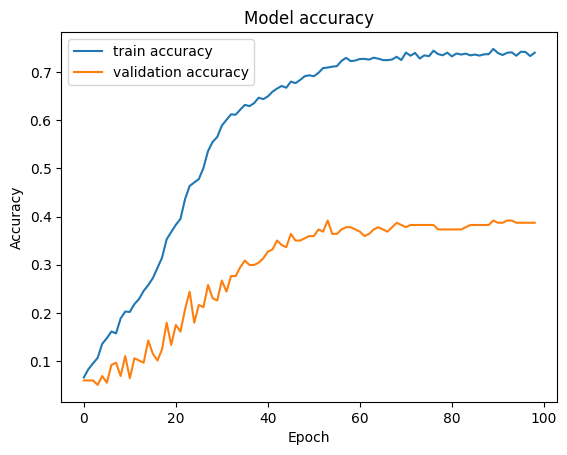

In [10]:
alex_net_wrapper.plot_accuracy()

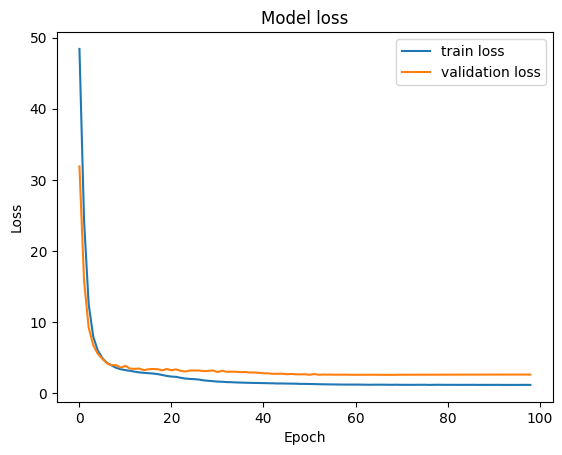

In [11]:
alex_net_wrapper.plot_loss()

In [12]:
alex_net_wrapper.load_model()

Loading model from "../../artifacts/models/AlexNet.h5"...
Model loaded successfully!


20/20 [==============================] - 1s 14ms/step - loss: 2.5701 - accuracy: 0.3861
Loss: 2.5701
Accuracy: 0.3861
20/20 [==============================] - 1s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        23
           1       0.29      0.20      0.24        25
           2       0.61      0.58      0.59        52
           3       0.29      0.29      0.29        38
           4       0.36      0.37      0.36        27
           5       0.23      0.37      0.29        35
           6       0.35      0.33      0.34        45
           7       0.07      0.10      0.08        10
           8       0.22      0.17      0.19        12
           9       0.20      0.09      0.13        11
          10       0.30      0.30      0.30        23
          11       0.67      0.62      0.64        26
          12       0.32      0.38      0.35        32
          13       0.30      0.53      0.38      

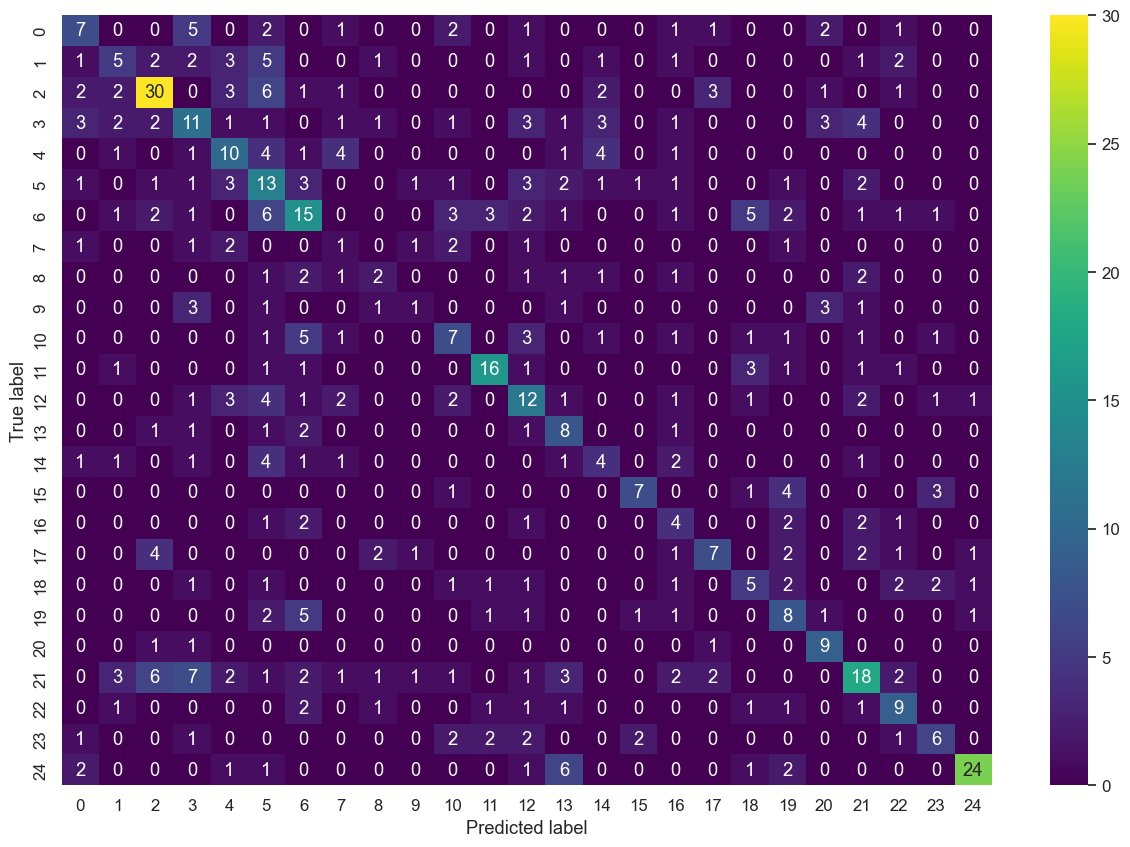

In [13]:
alex_net_wrapper.display_evaluation_results()